## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.regularizers import l1, l2, l1_l2

"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[1000, 500, 200, 100, 50], l2_ratio=1e-4):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l2(l2_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l2(l2_ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
L2_EXP = [1e-2, 1e-4, 1e-8, 1e-12, 1e-16]

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for regulizer_ratio in L2_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Regulizer = %.6f" % (regulizer_ratio))
    model = build_mlp(input_shape=x_train.shape[1:], l2_ratio=regulizer_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-l2-%s" % str(regulizer_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with Regulizer = 0.010000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 1000)              3073000   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 500)               500500    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 200)               100200    
_________________________________________________________________
hidden_layer4 (Dense)        (None, 100)               20100     
_________________________________________________________________
hidden_layer5 (Dense)        (None, 50)                5050      
_________________________________________________________________
output (Dense)        

50000/50000 [==============================] - 24s 489us/step - loss: 1.7641 - accuracy: 0.5004 - val_loss: 1.8396 - val_accuracy: 0.4702
Epoch 46/50
50000/50000 [==============================] - 24s 477us/step - loss: 1.7558 - accuracy: 0.5031 - val_loss: 1.8716 - val_accuracy: 0.4604
Epoch 47/50
50000/50000 [==============================] - 24s 487us/step - loss: 1.7535 - accuracy: 0.5011 - val_loss: 1.9641 - val_accuracy: 0.4247
Epoch 48/50
50000/50000 [==============================] - -105504s -2110074us/step - loss: 1.7461 - accuracy: 0.5040 - val_loss: 1.8555 - val_accuracy: 0.4659
Epoch 49/50
50000/50000 [==============================] - 105554s 2s/step - loss: 1.7437 - accuracy: 0.5026 - val_loss: 1.9155 - val_accuracy: 0.4505
Epoch 50/50
50000/50000 [==============================] - -105492s -2109849us/step - loss: 1.7402 - accuracy: 0.5019 - val_loss: 1.8902 - val_accuracy: 0.4549
Experiment with Regulizer = 0.000100
Model: "model_1"
_____________________________________

Epoch 40/50
50000/50000 [==============================] - 25s 492us/step - loss: 1.0445 - accuracy: 0.7214 - val_loss: 1.7368 - val_accuracy: 0.5214
Epoch 41/50
50000/50000 [==============================] - 25s 508us/step - loss: 1.0236 - accuracy: 0.7290 - val_loss: 1.7192 - val_accuracy: 0.5353
Epoch 42/50
50000/50000 [==============================] - 25s 509us/step - loss: 1.0132 - accuracy: 0.7320 - val_loss: 1.7940 - val_accuracy: 0.5185
Epoch 43/50
50000/50000 [==============================] - 26s 511us/step - loss: 0.9889 - accuracy: 0.7407 - val_loss: 2.1328 - val_accuracy: 0.4776
Epoch 44/50
50000/50000 [==============================] - 25s 497us/step - loss: 0.9798 - accuracy: 0.7466 - val_loss: 1.7650 - val_accuracy: 0.5322
Epoch 45/50
50000/50000 [==============================] - 25s 499us/step - loss: 0.9532 - accuracy: 0.7546 - val_loss: 2.0460 - val_accuracy: 0.4941
Epoch 46/50
50000/50000 [==============================] - 26s 521us/step - loss: 0.9326 - accuracy:

50000/50000 [==============================] - 26s 518us/step - loss: 0.8882 - accuracy: 0.6808 - val_loss: 1.4573 - val_accuracy: 0.5196
Epoch 36/50
50000/50000 [==============================] - 25s 492us/step - loss: 0.8793 - accuracy: 0.6890 - val_loss: 1.4360 - val_accuracy: 0.5252
Epoch 37/50
50000/50000 [==============================] - 26s 530us/step - loss: 0.8534 - accuracy: 0.6960 - val_loss: 1.5009 - val_accuracy: 0.5101
Epoch 38/50
50000/50000 [==============================] - 25s 507us/step - loss: 0.8355 - accuracy: 0.7055 - val_loss: 1.4608 - val_accuracy: 0.5259
Epoch 39/50
50000/50000 [==============================] - 26s 510us/step - loss: 0.8169 - accuracy: 0.7099 - val_loss: 1.4351 - val_accuracy: 0.5347
Epoch 40/50
50000/50000 [==============================] - 26s 527us/step - loss: 0.7978 - accuracy: 0.7156 - val_loss: 1.6062 - val_accuracy: 0.5110
Epoch 41/50
50000/50000 [==============================] - 25s 502us/step - loss: 0.7770 - accuracy: 0.7228 - va

50000/50000 [==============================] - 27s 534us/step - loss: 0.9485 - accuracy: 0.6672 - val_loss: 1.6158 - val_accuracy: 0.4754
Epoch 31/50
50000/50000 [==============================] - 28s 563us/step - loss: 0.9350 - accuracy: 0.6685 - val_loss: 1.4690 - val_accuracy: 0.5092
Epoch 32/50
50000/50000 [==============================] - 29s 583us/step - loss: 0.9140 - accuracy: 0.6765 - val_loss: 1.4774 - val_accuracy: 0.5042
Epoch 33/50
50000/50000 [==============================] - 29s 585us/step - loss: 0.8917 - accuracy: 0.6848 - val_loss: 1.4305 - val_accuracy: 0.5229
Epoch 34/50
50000/50000 [==============================] - 29s 586us/step - loss: 0.8693 - accuracy: 0.6947 - val_loss: 1.4218 - val_accuracy: 0.5259
Epoch 35/50
50000/50000 [==============================] - 29s 586us/step - loss: 0.8468 - accuracy: 0.7004 - val_loss: 1.4443 - val_accuracy: 0.5270
Epoch 36/50
50000/50000 [==============================] - 29s 587us/step - loss: 0.8274 - accuracy: 0.7071 - va

50000/50000 [==============================] - 70604s 1s/step - loss: 1.0553 - accuracy: 0.6255 - val_loss: 1.3365 - val_accuracy: 0.5317
Epoch 26/50
50000/50000 [==============================] - -70601s -1412023us/step - loss: 1.0407 - accuracy: 0.6301 - val_loss: 1.3527 - val_accuracy: 0.5270
Epoch 27/50
50000/50000 [==============================] - 70651s 1s/step - loss: 1.0171 - accuracy: 0.6398 - val_loss: 1.4557 - val_accuracy: 0.5087
Epoch 28/50
50000/50000 [==============================] - 25s 508us/step - loss: 0.9982 - accuracy: 0.6456 - val_loss: 1.3704 - val_accuracy: 0.5282
Epoch 29/50
50000/50000 [==============================] - -70381s -1407614us/step - loss: 0.9766 - accuracy: 0.6513 - val_loss: 1.3910 - val_accuracy: 0.5227
Epoch 30/50
50000/50000 [==============================] - 70432s 1s/step - loss: 0.9567 - accuracy: 0.6596 - val_loss: 1.4040 - val_accuracy: 0.5253
Epoch 31/50
50000/50000 [==============================] - 25s 498us/step - loss: 0.9387 - acc

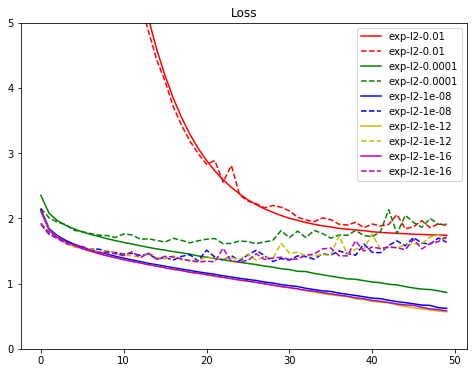

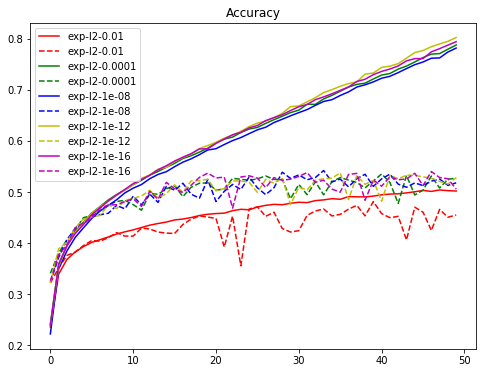

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""

color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()